The purpose of this notebook is for data understanding and feature discovery. Feature importance analysis and feature engineering is in the next notebook.

In [1]:
import pandas as pd
import numpy as np
import re
from scipy.stats import chi2_contingency
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

In [83]:
file_path = '../data/clickdata.csv'
df = pd.read_csv(file_path)

In [3]:
df

epoch_ms                        session_id country_by_ip_address  \
0      1520280001034  be73c8d1b836170a21529a1b23140f8e                    US   
1      1520280001590  c24c6637ed7dcbe19ad64056184212a7                    US   
2      1520280002397  ee391655f5680a7bfae0019450aed396                    IT   
3      1520280002598  f8c8a696dd37ca88233b2df096afa97f                    US   
4      1520280004428  f8b0c06747b7dd1d53c0932306bd04d6                    US   
...              ...                               ...                   ...   
59777  1520287193332  6a98ec825aa0ccdc2aefb0d02f291cde                    NL   
59778  1520287193930  70664825c07eeb2af81c77e7ef6f7493                    US   
59779  1520287196302  99935d53a2f5d6e95adaecba3ec288e6                    US   
59780  1520287197700  0bff91927029f6402eff065680b0d8d8                    US   
59781  1520287199048  01201ebb918c64ea4dabdabdfbcbd1b0                    NL   

      region_by_ip_address                             url_without_parameters  \
0                       CA  https://www.bol.com/nl/l/nederlandstalige-kuns...   
1                       CA  https://www.bol.com/nl/l/italiaans-natuur-wete...   
2                       LI  https://www.bol.com/nl/p/nespresso-magimix-ini...   
3                       CA  https://www.bol.com/nl/l/nieuwe-engelstalige-o...   
4                       CA  https://www.bol.com/nl/l/nieuwe-actie-avontuur...   
...                    ...                                                ...   
59777                   NH  https://www.bol.com/nl/p/gladskin-rosacea-gel-...   
59778                   CA  https://www.bol.com/nl/p/homedecoration-toront...   
59779                   CA  https://www.bol.com/nl/l/witte-nike-sportshirt...   
59780                   CA  https://www.bol.com/nl/l/gadgetbay-randapparat...   
59781                  NaN  https://www.bol.com/nl/p/hp-z3700-draadloze-mu...   

                             referrer_without_parameters  \
0                                                    NaN   
1                                                    NaN   
2      https://www.bol.com/nl/p/nespresso-magimix-ini...   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
59777                                                NaN   
59778                                                NaN   
59779                                                NaN   
59780                                                NaN   
59781                                                NaN   

      visitor_recognition_type ua_agent_class  
0                    ANONYMOUS          Robot  
1                    ANONYMOUS          Robot  
2                    ANONYMOUS        Browser  
3                    ANONYMOUS          Robot  
4                    ANONYMOUS   Robot Mobile  
...                        ...            ...  
59777               RECOGNIZED        Browser  
59778                ANONYMOUS          Robot  
59779                ANONYMOUS          Robot  
59780                ANONYMOUS          Robot  
59781                ANONYMOUS        Browser  

[59782 rows x 8 columns]

In [4]:
df.dtypes

epoch_ms                        int64
session_id                     object
country_by_ip_address          object
region_by_ip_address           object
url_without_parameters         object
referrer_without_parameters    object
visitor_recognition_type       object
ua_agent_class                 object
dtype: object

In [5]:
# Convert the timestamp column to datetime
df['time'] = pd.to_datetime(df['epoch_ms'], unit='ms')

In [6]:
# Extract features from datetime
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df['hour'] = df['time'].dt.hour
df['minute'] = df['time'].dt.minute

In [8]:
df.dtypes

epoch_ms                                int64
session_id                             object
country_by_ip_address                  object
region_by_ip_address                   object
url_without_parameters                 object
referrer_without_parameters            object
visitor_recognition_type               object
ua_agent_class                         object
time                           datetime64[ns]
year                                    int32
month                                   int32
day                                     int32
hour                                    int32
minute                                  int32
dtype: object

In [9]:
df['ua_agent_class'].value_counts()

ua_agent_class
Browser              35509
Robot                16026
Robot Mobile          5115
Browser Webview       1800
Hacker                1177
Special                144
Mobile App               9
Cloud Application        2
Name: count, dtype: int64

In [10]:
df.describe(include="O")

session_id country_by_ip_address  \
count                              59782                 59534   
unique                             30816                    65   
top     0641f60deb7f86deff3c304b205e0f95                    NL   
freq                                 412                 25673   

       region_by_ip_address                    url_without_parameters  \
count                 49886                                     59782   
unique                  228                                     40696   
top                      CA  https://www.bol.com/nl/l/ajax/index.html   
freq                  20662                                      3508   

                              referrer_without_parameters  \
count                                               15004   
unique                                               6202   
top     https://www.bol.com/nl/s/algemeen/zoekresultat...   
freq                                                  693   

       visitor_recognition_type ua_agent_class  
count                     59782          59782  
unique                        3              8  
top                   ANONYMOUS        Browser  
freq                      43711          35509

In [11]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title='Dataset Profiling Report', explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## My improvements, discoveries and assumptions (compared with sample code):
- `ua_agent_class`
- Imbalanced classes: 
    - stratified split: should be applied for both cross validation and train_test_split
    - metrics: shouldn't be accuracy. should be F1-score or AU-PRC.
    - data resampling (oversampling or downsampling): the minority class is not the focus. Thus don't use resampling.   
- `epoch_ms` can be transferred to datetime format. Pertentially useful to extract time related features. 
    - But this dataset contains only one day data from 2 hours, thus not helpful.
    - Data collection suggestion: collect data across different time range
    - Logs are not complete for a session?
- Assumption: same `session_id` will have the same class. (part 2 description, each row is a dataset). A predictor or a rule? In practice, better predict on session level, not each row level
- URL might be useful


# `ua_agent_class`

In [13]:
df_base = df.drop(columns=['epoch_ms', 'year', 'month', 'day', 'hour', 'minute']).drop_duplicates()
# Reduce the amount of detail in classes
# Merge all different Human types
df_base['ua_agent_class'] = df_base['ua_agent_class'].str.replace('Browser Webview','Browser')
# Merge all different 'non hunam' types
df_base['ua_agent_class'] = df_base['ua_agent_class'].str.replace('Robot Mobile','Robot')
df_base['ua_agent_class'] = df_base['ua_agent_class'].str.replace('Special','Other')
df_base['ua_agent_class'] = df_base['ua_agent_class'].str.replace('Mobile App','Other')
df_base['ua_agent_class'] = df_base['ua_agent_class'].str.replace('Cloud Application','Other')

In [14]:
df_base['ua_agent_class'].value_counts()

ua_agent_class
Browser    37309
Robot      21141
Hacker      1177
Other        155
Name: count, dtype: int64

# Session related

In [15]:
# check assumption about session_id: same `session_id` will have the same class

unique_counts = df_base.groupby('session_id')['ua_agent_class'].nunique()
# Filter groups having more than one unique ua_agent_class
inconsistent_sessions = unique_counts[unique_counts > 1]
inconsistent_sessions

session_id
102aaeea0e500583161f343efe4c0237    2
d25e3d0d731f4a3e51ca15c478bea92c    2
Name: ua_agent_class, dtype: int64

In [16]:
df_base['session_id'].nunique()

30816

Total unique number of session_id: 30816, among which only two have non-unique classes.

In [17]:
df_base[df_base['session_id']=='102aaeea0e500583161f343efe4c0237'].sort_values('time')

session_id country_by_ip_address  \
9207   102aaeea0e500583161f343efe4c0237                    NL   
9297   102aaeea0e500583161f343efe4c0237                    NL   
17800  102aaeea0e500583161f343efe4c0237                    NL   
52323  102aaeea0e500583161f343efe4c0237                    NL   
43833  102aaeea0e500583161f343efe4c0237                    NL   
35251  102aaeea0e500583161f343efe4c0237                    NL   
1080   102aaeea0e500583161f343efe4c0237                    NL   
26655  102aaeea0e500583161f343efe4c0237                    NL   
35326  102aaeea0e500583161f343efe4c0237                    NL   
26753  102aaeea0e500583161f343efe4c0237                    NL   
18217  102aaeea0e500583161f343efe4c0237                    NL   
35484  102aaeea0e500583161f343efe4c0237                    NL   
44111  102aaeea0e500583161f343efe4c0237                    NL   
26868  102aaeea0e500583161f343efe4c0237                    NL   
52661  102aaeea0e500583161f343efe4c0237                    NL   
18319  102aaeea0e500583161f343efe4c0237                    NL   
35557  102aaeea0e500583161f343efe4c0237                    NL   
52729  102aaeea0e500583161f343efe4c0237                    NL   
26954  102aaeea0e500583161f343efe4c0237                    NL   
35634  102aaeea0e500583161f343efe4c0237                    NL   
35643  102aaeea0e500583161f343efe4c0237                    NL   
35672  102aaeea0e500583161f343efe4c0237                    NL   
18469  102aaeea0e500583161f343efe4c0237                    NL   
44367  102aaeea0e500583161f343efe4c0237                    NL   
53694  102aaeea0e500583161f343efe4c0237                    NL   
53763  102aaeea0e500583161f343efe4c0237                    NL   
53841  102aaeea0e500583161f343efe4c0237                    NL   

      region_by_ip_address                             url_without_parameters  \
9207                    NH  https://www.bol.com/nl/order/basket_bargains.html   
9297                    NH           https://www.bol.com/nl/s/ajax/index.html   
17800                   NH           https://www.bol.com/nl/s/ajax/index.html   
52323                   NH           https://www.bol.com/nl/s/ajax/index.html   
43833                   NH           https://www.bol.com/nl/s/ajax/index.html   
35251                   NH  https://www.bol.com/nl/p/lego-friends-wintersp...   
1080                    NH  https://www.bol.com/nl/s/algemeen/zoekresultat...   
26655                   NH  https://www.bol.com/nl/p/lego-friends-andrea-s...   
35326                   NH  https://www.bol.com/nl/s/algemeen/zoekresultat...   
26753                   NH           https://www.bol.com/nl/s/ajax/index.html   
18217                   NH  https://www.bol.com/nl/p/lego-technic-wegenbou...   
35484                   NH  https://www.bol.com/nl/s/algemeen/zoekresultat...   
44111                   NH  https://www.bol.com/nl/p/lego-technic-whack-42...   
26868                   NH  https://www.bol.com/nl/s/algemeen/zoekresultat...   
52661                   NH  https://www.bol.com/nl/p/lego-technic-bash-420...   
18319                   NH  https://www.bol.com/nl/s/algemeen/zoekresultat...   
35557                   NH  https://www.bol.com/nl/p/lego-technic-ultralig...   
52729                   NH  https://www.bol.com/nl/s/algemeen/zoekresultat...   
26954                   NH  https://www.bol.com/nl/p/lego-technic-bash-420...   
35634                   NH  https://www.bol.com/nl/s/algemeen/zoekresultat...   
35643                   NH  https://www.bol.com/nl/p/lego-technic-whack-42...   
35672                   NH  https://www.bol.com/nl/order/basket_bargains.html   
18469                   NH  https://www.bol.com/nl/order/basket_bargains.html   
44367                   NH  https://www.bol.com/nl/s/speelgoed/zoekresulta...   
53694                   NH  https://www.bol.com/nl/order/basket_bargains.html   
53763                   NH           https://www.bol.com/nl/s/ajax/index.html   
53841                

In [18]:
df_base[df_base['session_id']=='d25e3d0d731f4a3e51ca15c478bea92c'].sort_values('time')

session_id country_by_ip_address  \
9532   d25e3d0d731f4a3e51ca15c478bea92c                    NL   
1236   d25e3d0d731f4a3e51ca15c478bea92c                    NL   
27104  d25e3d0d731f4a3e51ca15c478bea92c                    NL   
1615   d25e3d0d731f4a3e51ca15c478bea92c                    NL   

      region_by_ip_address                             url_without_parameters  \
9532                   NaN  https://www.bol.com/nl/p/kidszone-zomer-2018/9...   
1236                   NaN  https://www.bol.com/nl/p/kids-top-100-2018/920...   
27104                  NaN  https://www.bol.com/nl/p/de-grootste-vakantieh...   
1615                   NaN  https://www.bol.com/nl/p/de-leukste-kids-hits-...   

                             referrer_without_parameters  \
9532                                                 NaN   
1236   https://www.bol.com/nl/p/kidszone-zomer-2018/9...   
27104  https://www.bol.com/nl/p/kids-top-100-2018/920...   
1615   https://www.bol.com/nl/p/kids-top-100-2018/920...   

      visitor_recognition_type ua_agent_class                    time  
9532                 ANONYMOUS         Hacker 2018-03-05 20:11:29.433  
1236                 ANONYMOUS        Browser 2018-03-05 20:13:55.985  
27104                ANONYMOUS        Browser 2018-03-05 20:17:03.407  
1615                 ANONYMOUS        Browser 2018-03-05 20:18:15.038

Looks like anomalies in the log. Remove these two records. 

My assumption is confirmed: the same session should be in one class.

- Train test split should be based on session level or log line level?
    - what's the labeling process (if in log line level, data leakage?)
    - what's the real business senerio when there comes new data

**Train test split**:

test set: logs from only first several in one session.

If real time detection. intervention in time before the session ends.
If batch inferencing, process the session as a whole. 

In [19]:
df_base = df_base.drop(index=44367).drop(index=9532) 
# should not be hard coded in production code. Should be part of the preprocessing. 
# For data exploration in this notebook, it's okay to leave it like this.

**More checks about `session_id`**

In [20]:
unique_counts = df_base.groupby('session_id')['visitor_recognition_type'].nunique()
# Filter groups having more than one unique ua_agent_class
inconsistent_sessions = unique_counts[unique_counts > 1]
inconsistent_sessions

session_id
00c79989e7026cfda3616fb14f0d9610    2
00d2744eaf8cb0135c1c74bc3679e8d1    2
0120fa60a2d08208dd10a4316ff83a01    2
01302b8ffd4ccc060e926d01171651c7    2
0159b783935669ec36f41b68f9537ace    2
                                   ..
fe6d66cc8e6efbfcde8ebc524e751821    2
fe7fa28091a96bead41f467177245d28    2
fe839a747e35c055f4bbc8da844b1fc5    2
ff242b2904439b39d14e59f3fe424cbc    2
ffaba59f3d7883ec208fc990f43cd3c4    2
Name: visitor_recognition_type, Length: 637, dtype: int64

In [21]:
df_base[df_base['session_id']=='00c79989e7026cfda3616fb14f0d9610'].sort_values('time')

session_id country_by_ip_address  \
5625   00c79989e7026cfda3616fb14f0d9610                    NL   
57375  00c79989e7026cfda3616fb14f0d9610                    NL   
48993  00c79989e7026cfda3616fb14f0d9610                    NL   
23127  00c79989e7026cfda3616fb14f0d9610                    NL   
40486  00c79989e7026cfda3616fb14f0d9610                    NL   
40512  00c79989e7026cfda3616fb14f0d9610                    NL   
40539  00c79989e7026cfda3616fb14f0d9610                    NL   
57575  00c79989e7026cfda3616fb14f0d9610                    NL   
6310   00c79989e7026cfda3616fb14f0d9610                    NL   

      region_by_ip_address                             url_without_parameters  \
5625                    FR          https://www.bol.com/nl/account/login.html   
57375                   FR  https://www.bol.com/nl/p/lowenthal-7-delige-ke...   
48993                   FR  https://www.bol.com/nl/p/5-delig-pannenset-geg...   
23127                   FR  https://www.bol.com/nl/p/8delige-keramische-pa...   
40486                   FR           https://www.bol.com/nl/s/ajax/index.html   
40512                   FR  https://www.bol.com/nl/p/smulpan-hapjespan-25-...   
40539                   FR  https://www.bol.com/nl/p/pannenset-3-delig-ema...   
57575                   FR  https://www.bol.com/nl/p/pannenset-3-delig-ema...   
6310                    FR  https://www.bol.com/nl/lijstjes/verlanglijstje...   

                             referrer_without_parameters  \
5625                            https://www.bol.com/nl//   
57375                                                NaN   
48993  https://www.bol.com/nl/p/lowenthal-7-delige-ke...   
23127  https://www.bol.com/nl/p/5-delig-pannenset-geg...   
40486                                                NaN   
40512  https://www.bol.com/nl/s/algemeen/zoekresultat...   
40539  https://www.bol.com/nl/p/smulpan-hapjespan-25-...   
57575  https://www.bol.com/nl/p/pannenset-3-delig-ema...   
6310   https://www.bol.com/nl/p/pannenset-3-delig-ema...   

      visitor_recognition_type ua_agent_class                    time  
5625                RECOGNIZED        Browser 2018-03-05 21:08:34.352  
57375                 LOGGEDIN        Browser 2018-03-05 21:14:16.348  
48993                 LOGGEDIN        Browser 2018-03-05 21:14:46.723  
23127                 LOGGEDIN        Browser 2018-03-05 21:15:03.784  
40486                 LOGGEDIN        Browser 2018-03-05 21:15:52.741  
40512                 LOGGEDIN        Browser 2018-03-05 21:16:19.722  
40539                 LOGGEDIN        Browser 2018-03-05 21:16:39.590  
57575                 LOGGEDIN        Browser 2018-03-05 21:17:09.360  
6310                  LOGGEDIN        Browser 2018-03-05 21:17:24.882

In [22]:
df_base[df_base['session_id']=='00d2744eaf8cb0135c1c74bc3679e8d1'].sort_values('time')

session_id country_by_ip_address  \
57596  00d2744eaf8cb0135c1c74bc3679e8d1                    BE   
23274  00d2744eaf8cb0135c1c74bc3679e8d1                    BE   
23816  00d2744eaf8cb0135c1c74bc3679e8d1                    BE   
41204  00d2744eaf8cb0135c1c74bc3679e8d1                    BE   
58243  00d2744eaf8cb0135c1c74bc3679e8d1                    BE   
49816  00d2744eaf8cb0135c1c74bc3679e8d1                    BE   
23945  00d2744eaf8cb0135c1c74bc3679e8d1                    BE   
15446  00d2744eaf8cb0135c1c74bc3679e8d1                    BE   
7039   00d2744eaf8cb0135c1c74bc3679e8d1                    BE   
32957  00d2744eaf8cb0135c1c74bc3679e8d1                    BE   
15719  00d2744eaf8cb0135c1c74bc3679e8d1                    BE   
24317  00d2744eaf8cb0135c1c74bc3679e8d1                    BE   

      region_by_ip_address                             url_without_parameters  \
57596                  VAN  https://www.bol.com/nl/order/basket_bargains.html   
23274                  VAN         https://www.bol.com/nl/checkout/login.html   
23816                  VAN  https://www.bol.com/nl/ra/algemeen/topdeals/23...   
41204                  VAN          https://www.bol.com/nl/checkout/paid.html   
58243                  VAN  https://www.bol.com/nl/ra/algemeen/uitverkoop-...   
49816                  VAN  https://www.bol.com/nl/ra/elektronica/uitverko...   
23945                  VAN  https://www.bol.com/nl/p/philips-azur-performe...   
15446                  VAN  https://www.bol.com/nl/p/zuperzozial-50-gaten-...   
7039                   VAN  https://www.bol.com/nl/p/zuperzozial-50-gaten-...   
32957                  VAN    https://www.bol.com/nl/l/strijkplanken/N/12042/   
15719                  VAN           https://www.bol.com/nl/l/ajax/index.html   
24317                  VAN           https://www.bol.com/nl/l/ajax/index.html   

                             referrer_without_parameters  \
57596                                                NaN   
23274                                                NaN   
23816                                                NaN   
41204                                                NaN   
58243          https://www.bol.com/nl/checkout/paid.html   
49816  https://www.bol.com/nl/ra/algemeen/uitverkoop-...   
23945  https://www.bol.com/nl/ra/elektronica/uitverko...   
15446                                                NaN   
7039   https://www.bol.com/nl/p/zuperzozial-50-gaten-...   
32957                                                NaN   
15719    https://www.bol.com/nl/l/strijkplanken/N/12042/   
24317                                                NaN   

      visitor_recognition_type ua_agent_class                    time  
57596               RECOGNIZED        Browser 2018-03-05 21:17:26.304  
23274               RECOGNIZED        Browser 2018-03-05 21:17:41.298  
23816                 LOGGEDIN        Browser 2018-03-05 21:27:08.940  
41204                 LOGGEDIN        Browser 2018-03-05 21:28:15.434  
58243                 LOGGEDIN        Browser 2018-03-05 21:28:33.603  
49816                 LOGGEDIN        Browser 2018-03-05 21:28:38.771  
23945                 LOGGEDIN        Browser 2018-03-05 21:28:55.833  
15446                 LOGGEDIN        Browser 2018-03-05 21:29:56.075  
7039                  LOGGEDIN        Browser 2018-03-05 21:29:59.581  
32957                 LOGGEDIN        Browser 2018-03-05 21:34:51.967  
15719                 LOGGEDIN        Browser 2018-03-05 21:34:57.583  
24317                 LOGGEDIN        Browser 2018-03-05 21:35:01.892

Make sense.

In [23]:
df_base[df_base['session_id'].isin(inconsistent_sessions.index.to_list())]

session_id country_by_ip_address  \
5      805604ef78f095d44ea7534371735068                    NL   
19     6c3d7350dee7687fe8a550951ae2ad4a                    NL   
27     82a12abb21c32c5fdf2d90703dbe65db                    NL   
32     e8b6f52bc82659fb96dcd6115787dba7                    NL   
39     8e2499565ca2b5a8a1ece6080e09af5d                    NL   
...                                 ...                   ...   
59654  0c4a439f8f04213b7d1b0a399bd6f78f                    NL   
59676  94493783bd385fb3f8da169a71717ed4                    BE   
59707  a24ffea9967c13ae2ec38629490069ae                    BE   
59736  2c52ff2a3f133cb88a78d69a4fc4059c                    BE   
59760  99218e2231336a15c25edd79397c9c27                    NL   

      region_by_ip_address                             url_without_parameters  \
5                       NB  https://www.bol.com/nl/order/basket_bargains.html   
19                      ZH         https://www.bol.com/nl/checkout/login.html   
27                      ZH  https://www.bol.com/nl/p/dji-mavic-air-fly-mor...   
32                      NB          https://www.bol.com/nl/account/login.html   
39                      NB           https://www.bol.com/nl/c/ajax/index.html   
...                    ...                                                ...   
59654                   GE  https://www.bol.com/nl/m/sport-vrije-tijd/vaka...   
59676                  VLI           https://www.bol.com/nl/order/basket.html   
59707                  VAN  https://www.bol.com/nl/p/monzana-zitbank-80cm-...   
59736                  VBR          https://www.bol.com/nl/checkout/paid.html   
59760                   FR           https://www.bol.com/nl/w/ajax/index.html   

                             referrer_without_parameters  \
5                                                    NaN   
19                                                   NaN   
27                                                   NaN   
32     https://www.bol.com/nl/m/service/lekker-winkel...   
39                                                   NaN   
...                                                  ...   
59654  https://www.bol.com/nl/s/muziek/zoekresultaten...   
59676         https://www.bol.com/nl/checkout/login.html   
59707          https://www.bol.com/nl/l/hockers/N/14047/   
59736                                                NaN   
59760                                                NaN   

      visitor_recognition_type ua_agent_class                    time  
5                    ANONYMOUS        Browser 2018-03-05 20:00:09.777  
19                  RECOGNIZED        Browser 2018-03-05 20:00:23.995  
27                   ANONYMOUS        Browser 2018-03-05 20:00:33.632  
32                   ANONYMOUS        Browser 2018-03-05 20:00:35.130  
39                  RECOGNIZED        Browser 2018-03-05 20:00:39.188  
...                        ...            ...                     ...  
59654                 LOGGEDIN        Browser 2018-03-05 21:57:22.989  
59676                 LOGGEDIN        Browser 2018-03-05 21:57:54.533  
59707                 LOGGEDIN        Browser 2018-03-05 21:58:39.902  
59736                 LOGGEDIN        Browser 2018-03-05 21:59:15.437  
59760                 LOGGEDIN        Browser 2018-03-05 21:59:41.728  

[7892 rows x 8 columns]

In [24]:
df_base[df_base['session_id']=='805604ef78f095d44ea7534371735068'].sort_values('time')

session_id country_by_ip_address  \
5      805604ef78f095d44ea7534371735068                    NL   
34225  805604ef78f095d44ea7534371735068                    NL   
52267  805604ef78f095d44ea7534371735068                    NL   

      region_by_ip_address                             url_without_parameters  \
5                       NB  https://www.bol.com/nl/order/basket_bargains.html   
34225                   NB         https://www.bol.com/nl/checkout/login.html   
52267                   NB          https://www.bol.com/nl/checkout/paid.html   

      referrer_without_parameters visitor_recognition_type ua_agent_class  \
5                             NaN                ANONYMOUS        Browser   
34225                         NaN                ANONYMOUS        Browser   
52267                         NaN                 LOGGEDIN        Browser   

                         time  
5     2018-03-05 20:00:09.777  
34225 2018-03-05 20:00:14.718  
52267 2018-03-05 20:10:18.812

In [25]:
df_base[df_base['session_id'].isin(inconsistent_sessions.index.to_list())]['ua_agent_class'].value_counts()

ua_agent_class
Browser    7892
Name: count, dtype: int64

Session related feature!
- number of unique visitor_recognition_type values in the same session. if >1, always browser. 
- number of pages per session
- time spent in session (how long users stay on the site) --> cumulating time spent in session
- time spent on page (how long users stay on the page)
- accumulating features from the start of the session.

In [26]:
unique_counts = df_base.groupby('session_id')['country_by_ip_address'].nunique()
# Filter groups having more than one unique ua_agent_class
inconsistent_sessions = unique_counts[unique_counts > 1]
inconsistent_sessions

session_id
013ad46bd0828def08f0b10c865e0fde    2
028a1b7ceed94bd449bef22e1cf33a79    4
037906e0756a097649a24596fbc42fa4    6
0e4da01378d66ad2d68af90a20fb4840    8
0ebdb9eccef211785cfa1179f271e4f3    2
                                   ..
eb0f909c88db2ba875061faff3c3434a    6
ed1a6fbaec81d7884b9985a910198333    5
f3a65169e52baea0eb08cc1c4056de25    5
f999fbedcd464f57d8a48b431c1cd136    6
fe4af60b494a99c3498ba32d4e8b8409    3
Name: country_by_ip_address, Length: 94, dtype: int64

In [27]:
df_base.groupby('session_id')['country_by_ip_address'].nunique().max()

12

In [28]:
df_base[df_base['session_id']=='013ad46bd0828def08f0b10c865e0fde'].sort_values('time')

session_id country_by_ip_address  \
23238  013ad46bd0828def08f0b10c865e0fde                    US   
23252  013ad46bd0828def08f0b10c865e0fde                    US   
14756  013ad46bd0828def08f0b10c865e0fde                    US   
57607  013ad46bd0828def08f0b10c865e0fde                    US   
57610  013ad46bd0828def08f0b10c865e0fde                    US   
6329   013ad46bd0828def08f0b10c865e0fde                    US   
23280  013ad46bd0828def08f0b10c865e0fde                    US   
23282  013ad46bd0828def08f0b10c865e0fde                    BE   
23285  013ad46bd0828def08f0b10c865e0fde                    BE   
40608  013ad46bd0828def08f0b10c865e0fde                    BE   
14774  013ad46bd0828def08f0b10c865e0fde                    BE   

      region_by_ip_address                             url_without_parameters  \
23238                   NV  https://www.bol.com/nl/p/ion-mustang-lp-zwart/...   
23252                   CA  https://www.bol.com/nl/p/gpo-platenkoffer-blau...   
14756                   IL  https://www.bol.com/nl/p/gpo-platenkoffer-blau...   
57607                   WA  https://www.bol.com/nl/p/pro-ject-vt-e-bluetoo...   
57610                   NV  https://www.bol.com/nl/p/pro-ject-vt-e-bluetoo...   
6329                    NV  https://www.bol.com/nl/p/soundmaster-nr916-nos...   
23280                   NV  https://www.bol.com/nl/p/gpo-flightcase-blueto...   
23282                  BRU  https://www.bol.com/nl/p/roadstar-tt-380bt-t-d...   
23285                  BRU  https://www.bol.com/nl/p/crosley-switch-blueto...   
40608                  BRU  https://www.bol.com/nl/p/crosley-bermuda-plate...   
14774                  BRU  https://www.bol.com/nl/p/gpo-bermuda-dansette-...   

      referrer_without_parameters visitor_recognition_type ua_agent_class  \
23238                         NaN                ANONYMOUS        Browser   
23252                         NaN                ANONYMOUS        Browser   
14756                         NaN                ANONYMOUS        Browser   
57607                         NaN                ANONYMOUS        Browser   
57610                         NaN                ANONYMOUS        Browser   
6329                          NaN                ANONYMOUS        Browser   
23280                         NaN                ANONYMOUS        Browser   
23282                         NaN                ANONYMOUS        Browser   
23285                         NaN                ANONYMOUS        Browser   
40608                         NaN                ANONYMOUS        Browser   
14774                         NaN                ANONYMOUS        Browser   

                         time  
23238 2018-03-05 21:17:05.708  
23252 2018-03-05 21:17:22.278  
14756 2018-03-05 21:17:32.057  
57607 2018-03-05 21:17:39.362  
57610 2018-03-05 21:17:41.305  
6329  2018-03-05 21:17:42.952  
23280 2018-03-05 21:17:45.159  
23282 2018-03-05 21:17:48.991  
23285 2018-03-05 21:17:50.394  
40608 2018-03-05 21:17:52.039  
14774 2018-03-05 21:17:54.453

In [29]:
df_base[df_base['session_id']=='028a1b7ceed94bd449bef22e1cf33a79'].sort_values('time')

session_id country_by_ip_address  \
9591   028a1b7ceed94bd449bef22e1cf33a79                    US   
43910  028a1b7ceed94bd449bef22e1cf33a79                    US   
52428  028a1b7ceed94bd449bef22e1cf33a79                    GB   
52433  028a1b7ceed94bd449bef22e1cf33a79                    GB   
52435  028a1b7ceed94bd449bef22e1cf33a79                    GB   
18087  028a1b7ceed94bd449bef22e1cf33a79                    GB   
18088  028a1b7ceed94bd449bef22e1cf33a79                    GB   
1105   028a1b7ceed94bd449bef22e1cf33a79                    GB   
35307  028a1b7ceed94bd449bef22e1cf33a79                    GB   
9609   028a1b7ceed94bd449bef22e1cf33a79                    GB   
43934  028a1b7ceed94bd449bef22e1cf33a79                    GB   
35316  028a1b7ceed94bd449bef22e1cf33a79                    GB   
9612   028a1b7ceed94bd449bef22e1cf33a79                    GB   
18107  028a1b7ceed94bd449bef22e1cf33a79                    GB   
18111  028a1b7ceed94bd449bef22e1cf33a79                    GB   
1130   028a1b7ceed94bd449bef22e1cf33a79                    GB   
52464  028a1b7ceed94bd449bef22e1cf33a79                    GB   
26699  028a1b7ceed94bd449bef22e1cf33a79                    GB   
52466  028a1b7ceed94bd449bef22e1cf33a79                    GB   
9625   028a1b7ceed94bd449bef22e1cf33a79                    GB   
26702  028a1b7ceed94bd449bef22e1cf33a79                    GB   
26709  028a1b7ceed94bd449bef22e1cf33a79                    US   
1151   028a1b7ceed94bd449bef22e1cf33a79                    PT   
52483  028a1b7ceed94bd449bef22e1cf33a79                    PT   
18147  028a1b7ceed94bd449bef22e1cf33a79                    PT   
35375  028a1b7ceed94bd449bef22e1cf33a79                    FI   
9652   028a1b7ceed94bd449bef22e1cf33a79                    FI   
52492  028a1b7ceed94bd449bef22e1cf33a79                    FI   
9660   028a1b7ceed94bd449bef22e1cf33a79                    US   
43997  028a1b7ceed94bd449bef22e1cf33a79                    US   
52507  028a1b7ceed94bd449bef22e1cf33a79                    US   
52511  028a1b7ceed94bd449bef22e1cf33a79                    US   
52514  028a1b7ceed94bd449bef22e1cf33a79                    US   

      region_by_ip_address                             url_without_parameters  \
9591                    AZ  https://www.bol.com/nl/p/flymo-haagschaar-easi...   
43910                   AZ  https://www.bol.com/nl/p/tectake-haagschaar-in...   
52428                  ENG  https://www.bol.com/nl/p/wolf-garten-boomschaa...   
52433                  ENG  https://www.bol.com/nl/l/tuin/tuingereedschap-...   
52435                  ENG  https://www.bol.com/nl/p/hofftech-buxusschaar-...   
18087                  ENG  https://www.bol.com/nl/p/powerplus-powxg2016-b...   
18088                  ENG  https://www.bol.com/nl/p/wolf-elektrische-hegg...   
1105                   ENG  https://www.bol.com/nl/p/flexovit-wetstenen-18...   
35307                  ENG  https://www.bol.com/nl/p/felco-910-lederen-hol...   
9609                   ENG  https://www.bol.com/nl/p/bosch-grasschaar-mes-...   
43934                  ENG  https://www.bol.com/nl/p/scheppach-multifuncti...   
35316                  ENG  https://www.bol.com/nl/p/takkenschaar-aambeeld...   
9612                   ENG  https://www.bol.com/nl/p/silverline-uitschuifb...   
18107                  ENG  https://www.bol.com/nl/p/felco-9-snoeischaar-l...   
18111                  ENG  https://www.bol.com/nl/p/kinzo-3-in-1-snoeisch...   
1130                   ENG  https://www.bol.com/nl/p/bladschaar-trimschaar...   
52464                  ENG  https://www.bol.com/nl/p/talen-tools-bloemensc...   
26699                  ENG  https://www.bol.com/nl/p/wolf-garten-batterij-...   
52466                  ENG  https://www.bol.com/nl/p/bosch-universalhedgec...   
9625                   ENG  https://www.bol.com/nl/p/gardena-powercut-li-4...   
26702                  ENG  https://www.bol.com/nl/p/groene-bloemensnijder...   
26709                   AZ  https://

Observation: For a same session, the country_by_ip_address and region_by_ip_address can be different. Looks like via VPN. Need further check. 

## Feature Engineering w.r.t. Session

- number of unique visitor_recognition_type values in the same session. if >1, always browser. 
- number of pages per session
- time spent in session (how long users stay on the site) --> cumulating time spent in session
- time spent on page (how long users stay on the page)
- accumulating features from the start of the session.

In [74]:
# Sort by session_id and datetime
# df_base.sort_values(by=['session_id', 'time'], inplace=True)

In [75]:
df_base

session_id country_by_ip_address  \
27305  000339eb8412724e0ecd55e695fd5ea1                    US   
27421  00070b81850bd8cf15019f8aa469820c                    US   
30585  0007273f5ce02adbfbc3058f9e801cc5                    US   
59710  0007d22c96b6168fd41b7a5360edee75                    FR   
50929  000a3e043e0b4d9832c4ea10710502fd                    NL   
...                                 ...                   ...   
36050  fff6621ab803217e98f99f7328e46a40                    NL   
57377  fff7b8c890847fff585e61573c3667b5                    US   
49013  fffc13529d0f34dff188b214477e3327                    US   
1977   fffc1c7043c575997dec89551b295b67                    US   
6747   ffffb4fc4a1e5f4eb81fe99fcc5a712f                    US   

      region_by_ip_address                             url_without_parameters  \
27305                   CA  https://www.bol.com/nl/l/juniwer-design-baby-p...   
27421                   CA  https://www.bol.com/nl/p/modern-questions-of-c...   
30585                   CA  https://www.bol.com/nl/c/gabrielli-players/256...   
59710                  NaN  https://www.bol.com/nl/p/asus-versasleeve-7i-b...   
50929                  NaN           https://www.bol.com/nl/s/ajax/index.html   
...                    ...                                                ...   
36050                   ZE  https://www.bol.com/nl/p/vidaxl-binnenfontein-...   
57377                   CA  https://www.bol.com/nl/l/engelstalige-outdoor-...   
49013                   CA  https://www.bol.com/nl/p/marcato-atlas-150-wel...   
1977                    CA  https://www.bol.com/nl/l/agenda-s-2018/N/25305...   
6747                    WA  https://www.bol.com/nl/s/elektronica/zoekresul...   

                             referrer_without_parameters  \
27305                                                NaN   
27421                                                NaN   
30585                                                NaN   
59710  https://www.bol.com/nl/p/asus-versasleeve-7i-b...   
50929  https://www.bol.com/nl/s/elektronica/zoekresul...   
...                                                  ...   
36050                                                NaN   
57377                                                NaN   
49013                                                NaN   
1977                                                 NaN   
6747                                                 NaN   

      visitor_recognition_type ua_agent_class                    time  
27305                ANONYMOUS          Robot 2018-03-05 20:19:34.719  
27421                ANONYMOUS          Robot 2018-03-05 20:20:41.010  
30585                ANONYMOUS          Robot 2018-03-05 20:59:56.066  
59710                ANONYMOUS        Browser 2018-03-05 21:58:40.328  
50929               RECOGNIZED        Browser 2018-03-05 21:50:42.158  
...                        ...            ...                     ...  
36050                ANONYMOUS        Browser 2018-03-05 20:20:33.805  
57377                ANONYMOUS          Robot 2018-03-05 21:14:16.649  
49013                ANONYMOUS          Robot 2018-03-05 21:15:09.957  
1977                 ANONYMOUS          Robot 2018-03-05 20:22:00.034  
6747                 ANONYMOUS          Robot 2018-03-05 21:24:57.685  

[59780 rows x 8 columns]

In [30]:
# Aggregate session-level features
session_features = df_base.groupby('session_id').agg(
    num_unique_visitor_recognition_type=('visitor_recognition_type', 'nunique'),
    num_requests=('time', 'count'),
    num_unique_pages_visited=('url_without_parameters', 'nunique'),
    session_duration=('time', lambda x: (x.max() - x.min()).total_seconds()),
    avg_time_between_requests=('time', lambda x: (x.max() - x.min()).total_seconds() / (len(x) - 1) if len(x) > 1 else 0), 
    count_referer=('referrer_without_parameters', 'count'),
    most_frequent_page=('url_without_parameters', lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan),
    first_page_visited=('url_without_parameters', 'first'),
    last_page_visited=('url_without_parameters', 'last')
).reset_index()

In [31]:
session_features

session_id  num_unique_visitor_recognition_type  \
0      000339eb8412724e0ecd55e695fd5ea1                                    1   
1      00070b81850bd8cf15019f8aa469820c                                    1   
2      0007273f5ce02adbfbc3058f9e801cc5                                    1   
3      0007d22c96b6168fd41b7a5360edee75                                    1   
4      000a3e043e0b4d9832c4ea10710502fd                                    1   
...                                 ...                                  ...   
30811  fff6621ab803217e98f99f7328e46a40                                    1   
30812  fff7b8c890847fff585e61573c3667b5                                    1   
30813  fffc13529d0f34dff188b214477e3327                                    1   
30814  fffc1c7043c575997dec89551b295b67                                    1   
30815  ffffb4fc4a1e5f4eb81fe99fcc5a712f                                    1   

       num_requests  num_unique_pages_visited  session_duration  \
0                 1                         1             0.000   
1                 1                         1             0.000   
2                 1                         1             0.000   
3                 1                         1             0.000   
4                 6                         5           243.209   
...             ...                       ...               ...   
30811             1                         1             0.000   
30812             1                         1             0.000   
30813             1                         1             0.000   
30814             1                         1             0.000   
30815             1                         1             0.000   

       avg_time_between_requests  count_referer  \
0                         0.0000              0   
1                         0.0000              0   
2                         0.0000              0   
3                         0.0000              1   
4                        48.6418              5   
...                          ...            ...   
30811                     0.0000              0   
30812                     0.0000              0   
30813                     0.0000              0   
30814                     0.0000              0   
30815                     0.0000              0   

                                      most_frequent_page  \
0      https://www.bol.com/nl/l/juniwer-design-baby-p...   
1      https://www.bol.com/nl/p/modern-questions-of-c...   
2      https://www.bol.com/nl/c/gabrielli-players/256...   
3      https://www.bol.com/nl/p/asus-versasleeve-7i-b...   
4      https://www.bol.com/nl/p/panasonic-tx-32e200e-...   
...                                                  ...   
30811  https://www.bol.com/nl/p/vidaxl-binnenfontein-...   
30812  https://www.bol.com/nl/l/engelstalige-outdoor-...   
30813  https://www.bol.com/nl/p/marcato-atlas-150-wel...   
30814  https://www.bol.com/nl/l/agenda-s-2018/N/25305...   
30815  https://www.bol.com/nl/s/elektronica/zoekresul...   

                                      first_page_visited  \
0      https://www.bol.com/nl/l/juniwer-design-baby-p...   
1      https://www.bol.com/nl/p/modern-questions-of-c...   
2      https://www.bol.com/nl/c/gabrielli-players/256...   
3      https://www.bol.com/nl/p/asus-versasleeve-7i-b...   
4      https://www.bol.com/nl/p/panasonic-tx-32e200e-...   
...                                                  ...   
30811  https://www.bol.com/nl/p/vidaxl-binnenfontein-...   
30812  https://www.bol.com/nl/l/engelstalige-outdoor-...   
30813  https://www.bol.com/nl/p/marcato-atlas-150-wel...   
30814  https://www.bol.com/nl/l/agenda-s-2018/N/25305...   
30815  https://www.bol.com/nl/s/elektronica/zoekresul...   

                                       last_page_visited  
0      https://www.bol.com/nl/l/juniwer-design-baby-p...  
1      https://www.bol.com/nl/p/modern-questions-of-c...  
2      https://www.bol.com/nl/c

In [32]:
df_base[df_base['session_id']=='000339eb8412724e0ecd55e695fd5ea1']

session_id country_by_ip_address  \
27305  000339eb8412724e0ecd55e695fd5ea1                    US   

      region_by_ip_address                             url_without_parameters  \
27305                   CA  https://www.bol.com/nl/l/juniwer-design-baby-p...   

      referrer_without_parameters visitor_recognition_type ua_agent_class  \
27305                         NaN                ANONYMOUS          Robot   

                         time  
27305 2018-03-05 20:19:34.719

In [33]:
df_base[df_base['session_id']=='00070b81850bd8cf15019f8aa469820c']	

session_id country_by_ip_address  \
27421  00070b81850bd8cf15019f8aa469820c                    US   

      region_by_ip_address                             url_without_parameters  \
27421                   CA  https://www.bol.com/nl/p/modern-questions-of-c...   

      referrer_without_parameters visitor_recognition_type ua_agent_class  \
27421                         NaN                ANONYMOUS          Robot   

                         time  
27421 2018-03-05 20:20:41.010

In [34]:
df_base[df_base['session_id']=='000a3e043e0b4d9832c4ea10710502fd']	

session_id country_by_ip_address  \
8069   000a3e043e0b4d9832c4ea10710502fd                    NL   
16610  000a3e043e0b4d9832c4ea10710502fd                    NL   
25108  000a3e043e0b4d9832c4ea10710502fd                    NL   
33920  000a3e043e0b4d9832c4ea10710502fd                    NL   
42396  000a3e043e0b4d9832c4ea10710502fd                    NL   
50929  000a3e043e0b4d9832c4ea10710502fd                    NL   

      region_by_ip_address                             url_without_parameters  \
8069                   NaN  https://www.bol.com/nl/p/panasonic-tx-32e200e-...   
16610                  NaN  https://www.bol.com/nl/p/lg-32lj500u-32-hd-zwa...   
25108                  NaN  https://www.bol.com/nl/p/samsung-v32f390few-fu...   
33920                  NaN  https://www.bol.com/nl/p/panasonic-tx-32e200e-...   
42396                  NaN  https://www.bol.com/nl/s/elektronica/zoekresul...   
50929                  NaN           https://www.bol.com/nl/s/ajax/index.html   

                             referrer_without_parameters  \
8069   https://www.bol.com/nl/s/elektronica/zoekresul...   
16610  https://www.bol.com/nl/s/elektronica/zoekresul...   
25108  https://www.bol.com/nl/s/elektronica/zoekresul...   
33920  https://www.bol.com/nl/s/elektronica/zoekresul...   
42396                                                NaN   
50929  https://www.bol.com/nl/s/elektronica/zoekresul...   

      visitor_recognition_type ua_agent_class                    time  
8069                RECOGNIZED        Browser 2018-03-05 21:51:16.590  
16610               RECOGNIZED        Browser 2018-03-05 21:53:48.877  
25108               RECOGNIZED        Browser 2018-03-05 21:51:47.790  
33920               RECOGNIZED        Browser 2018-03-05 21:54:45.367  
42396               RECOGNIZED        Browser 2018-03-05 21:51:18.728  
50929               RECOGNIZED        Browser 2018-03-05 21:50:42.158

Check if when session_duration = 0, num_requests = 1:

In [35]:

session_features[session_features['session_duration']==0]['num_requests'].value_counts()

num_requests
1    27316
2        1
Name: count, dtype: int64

There is 1 session that has duration 0 but num_requests = 2

In [36]:

session_features[(session_features['session_duration']==0) & (session_features['num_requests']==2)]

session_id  num_unique_visitor_recognition_type  \
26956  e0967e571a7186cf741ef41b18fc70eb                                    1   

       num_requests  num_unique_pages_visited  session_duration  \
26956             2                         2               0.0   

       avg_time_between_requests  count_referer  \
26956                        0.0              1   

                                      most_frequent_page  \
26956  https://www.bol.com/nl/p/bbc-classics-collecti...   

                                      first_page_visited  \
26956  https://www.bol.com/nl/p/bbc-classics-collecti...   

                                       last_page_visited  
26956  https://www.bol.com/nl/p/piano-concertos/10000...

In [37]:
df_base[df_base['session_id']=='e0967e571a7186cf741ef41b18fc70eb']	

session_id country_by_ip_address  \
13794  e0967e571a7186cf741ef41b18fc70eb                    NL   
39639  e0967e571a7186cf741ef41b18fc70eb                    NL   

      region_by_ip_address                             url_without_parameters  \
13794                   ZH  https://www.bol.com/nl/p/bbc-classics-collecti...   
39639                   ZH  https://www.bol.com/nl/p/piano-concertos/10000...   

                             referrer_without_parameters  \
13794                                                NaN   
39639  https://www.bol.com/nl/p/complete-piano-concer...   

      visitor_recognition_type ua_agent_class                time  
13794               RECOGNIZED        Browser 2018-03-05 21:04:42  
39639               RECOGNIZED        Browser 2018-03-05 21:04:42

This is not a complete session??

In [38]:
df_base['referrer_without_parameters'][39639]

'https://www.bol.com/nl/p/complete-piano-concert/1000004005057694/'

In [39]:
df_base[df_base['url_without_parameters']=='https://www.bol.com/nl/p/complete-piano-concert/1000004005057694/']

Empty DataFrame
Columns: [session_id, country_by_ip_address, region_by_ip_address, url_without_parameters, referrer_without_parameters, visitor_recognition_type, ua_agent_class, time]
Index: []

In [40]:
# Check if session duration 0 are all robot
df_session_duration_0 = df_base[df_base['session_id'].isin(session_features[session_features['session_duration']==0]['session_id'].to_list())]

In [41]:
df_session_duration_0

session_id country_by_ip_address  \
0      be73c8d1b836170a21529a1b23140f8e                    US   
1      c24c6637ed7dcbe19ad64056184212a7                    US   
2      ee391655f5680a7bfae0019450aed396                    IT   
3      f8c8a696dd37ca88233b2df096afa97f                    US   
4      f8b0c06747b7dd1d53c0932306bd04d6                    US   
...                                 ...                   ...   
59776  a9b2829698a6f47552ba594e1e39d2db                    US   
59777  6a98ec825aa0ccdc2aefb0d02f291cde                    NL   
59778  70664825c07eeb2af81c77e7ef6f7493                    US   
59779  99935d53a2f5d6e95adaecba3ec288e6                    US   
59780  0bff91927029f6402eff065680b0d8d8                    US   

      region_by_ip_address                             url_without_parameters  \
0                       CA  https://www.bol.com/nl/l/nederlandstalige-kuns...   
1                       CA  https://www.bol.com/nl/l/italiaans-natuur-wete...   
2                       LI  https://www.bol.com/nl/p/nespresso-magimix-ini...   
3                       CA  https://www.bol.com/nl/l/nieuwe-engelstalige-o...   
4                       CA  https://www.bol.com/nl/l/nieuwe-actie-avontuur...   
...                    ...                                                ...   
59776                   CA  https://www.bol.com/nl/l/bosch-klusspullen/N/1...   
59777                   NH  https://www.bol.com/nl/p/gladskin-rosacea-gel-...   
59778                   CA  https://www.bol.com/nl/p/homedecoration-toront...   
59779                   CA  https://www.bol.com/nl/l/witte-nike-sportshirt...   
59780                   CA  https://www.bol.com/nl/l/gadgetbay-randapparat...   

                             referrer_without_parameters  \
0                                                    NaN   
1                                                    NaN   
2      https://www.bol.com/nl/p/nespresso-magimix-ini...   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
59776                                                NaN   
59777                                                NaN   
59778                                                NaN   
59779                                                NaN   
59780                                                NaN   

      visitor_recognition_type ua_agent_class                    time  
0                    ANONYMOUS          Robot 2018-03-05 20:00:01.034  
1                    ANONYMOUS          Robot 2018-03-05 20:00:01.590  
2                    ANONYMOUS        Browser 2018-03-05 20:00:02.397  
3                    ANONYMOUS          Robot 2018-03-05 20:00:02.598  
4                    ANONYMOUS          Robot 2018-03-05 20:00:04.428  
...                        ...            ...                     ...  
59776                ANONYMOUS          Robot 2018-03-05 21:59:53.329  
59777               RECOGNIZED        Browser 2018-03-05 21:59:53.332  
59778                ANONYMOUS          Robot 2018-03-05 21:59:53.930  
59779                ANONYMOUS          Robot 2018-03-05 21:59:56.302  
59780                ANONYMOUS          Robot 2018-03-05 21:59:57.700  

[27318 rows x 8 columns]

In [42]:
df_base[df_base['session_id']=='ee391655f5680a7bfae0019450aed396']	

session_id country_by_ip_address  \
2  ee391655f5680a7bfae0019450aed396                    IT   

  region_by_ip_address                             url_without_parameters  \
2                   LI  https://www.bol.com/nl/p/nespresso-magimix-ini...   

                         referrer_without_parameters visitor_recognition_type  \
2  https://www.bol.com/nl/p/nespresso-magimix-ini...                ANONYMOUS   

  ua_agent_class                    time  
2        Browser 2018-03-05 20:00:02.397

In [43]:
df_session_duration_0['ua_agent_class'].value_counts()

ua_agent_class
Robot      21129
Browser     4864
Hacker      1175
Other        150
Name: count, dtype: int64

* when session duration is 0, not all robot. Check feature importance of session_duration.

In [44]:
df_merged = df_base.merge(session_features, on='session_id', how='left')

In [45]:
df_merged

session_id country_by_ip_address  \
0      be73c8d1b836170a21529a1b23140f8e                    US   
1      c24c6637ed7dcbe19ad64056184212a7                    US   
2      ee391655f5680a7bfae0019450aed396                    IT   
3      f8c8a696dd37ca88233b2df096afa97f                    US   
4      f8b0c06747b7dd1d53c0932306bd04d6                    US   
...                                 ...                   ...   
59775  6a98ec825aa0ccdc2aefb0d02f291cde                    NL   
59776  70664825c07eeb2af81c77e7ef6f7493                    US   
59777  99935d53a2f5d6e95adaecba3ec288e6                    US   
59778  0bff91927029f6402eff065680b0d8d8                    US   
59779  01201ebb918c64ea4dabdabdfbcbd1b0                    NL   

      region_by_ip_address                             url_without_parameters  \
0                       CA  https://www.bol.com/nl/l/nederlandstalige-kuns...   
1                       CA  https://www.bol.com/nl/l/italiaans-natuur-wete...   
2                       LI  https://www.bol.com/nl/p/nespresso-magimix-ini...   
3                       CA  https://www.bol.com/nl/l/nieuwe-engelstalige-o...   
4                       CA  https://www.bol.com/nl/l/nieuwe-actie-avontuur...   
...                    ...                                                ...   
59775                   NH  https://www.bol.com/nl/p/gladskin-rosacea-gel-...   
59776                   CA  https://www.bol.com/nl/p/homedecoration-toront...   
59777                   CA  https://www.bol.com/nl/l/witte-nike-sportshirt...   
59778                   CA  https://www.bol.com/nl/l/gadgetbay-randapparat...   
59779                  NaN  https://www.bol.com/nl/p/hp-z3700-draadloze-mu...   

                             referrer_without_parameters  \
0                                                    NaN   
1                                                    NaN   
2      https://www.bol.com/nl/p/nespresso-magimix-ini...   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
59775                                                NaN   
59776                                                NaN   
59777                                                NaN   
59778                                                NaN   
59779                                                NaN   

      visitor_recognition_type ua_agent_class                    time  \
0                    ANONYMOUS          Robot 2018-03-05 20:00:01.034   
1                    ANONYMOUS          Robot 2018-03-05 20:00:01.590   
2                    ANONYMOUS        Browser 2018-03-05 20:00:02.397   
3                    ANONYMOUS          Robot 2018-03-05 20:00:02.598   
4                    ANONYMOUS          Robot 2018-03-05 20:00:04.428   
...                        ...            ...                     ...   
59775               RECOGNIZED        Browser 2018-03-05 21:59:53.332   
59776                ANONYMOUS          Robot 2018-03-05 21:59:53.930   
59777                ANONYMOUS          Robot 2018-03-05 21:59:56.302   
59778                ANONYMOUS          Robot 2018-03-05 21:59:57.700   
59779                ANONYMOUS        Browser 2018-03-05 21:59:59.048   

       num_unique_visitor_recognition_type  num_requests  \
0                                        1             1   
1                                        1             1   
2                                        1             1   
3                                        1             1   
4                                        1             1   
...                                    ...           ...   
59775                                    1             1   
59776                                    1             1   
59777                                    1             1   
59778                                    1             1   
59779            

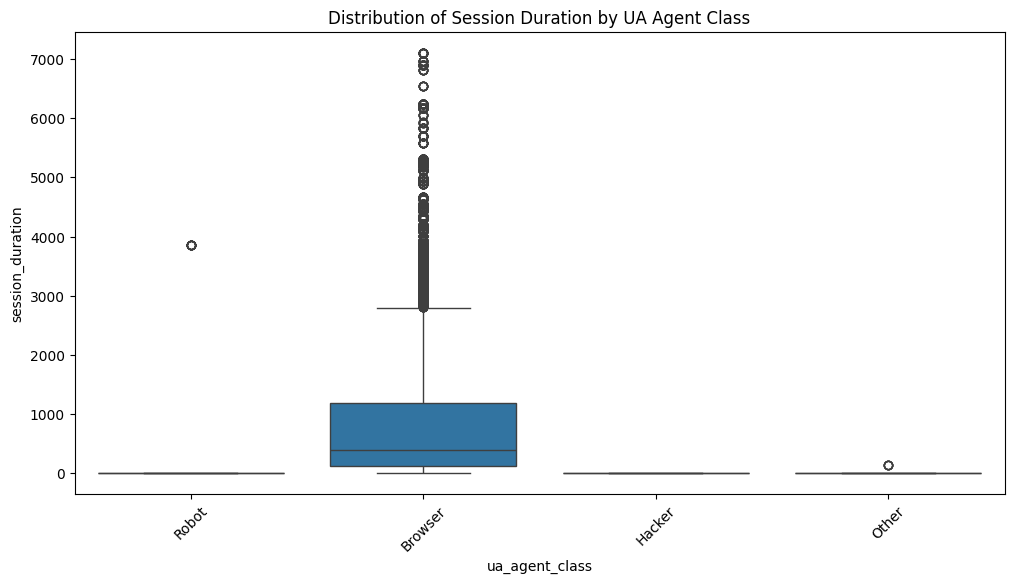

In [46]:
# Plot the distribution of session_duration for each class of ua_agent_class
plt.figure(figsize=(12, 6))
sns.boxplot(x='ua_agent_class', y='session_duration', data=df_merged)
plt.title('Distribution of Session Duration by UA Agent Class')
plt.xticks(rotation=45)
plt.show()


In [78]:
# Sort by session_id and datetime
df_merged.sort_values(by=['session_id', 'time'], inplace=True)

# Calculate time differences between consecutive requests in the same session
df_merged['time_diff'] = df_merged.groupby('session_id')['time'].diff().dt.total_seconds()

In [81]:
df_merged[df_merged['session_id']=='028a1b7ceed94bd449bef22e1cf33a79']	

session_id country_by_ip_address  \
9590   028a1b7ceed94bd449bef22e1cf33a79                    US   
43909  028a1b7ceed94bd449bef22e1cf33a79                    US   
52426  028a1b7ceed94bd449bef22e1cf33a79                    GB   
52431  028a1b7ceed94bd449bef22e1cf33a79                    GB   
52433  028a1b7ceed94bd449bef22e1cf33a79                    GB   
18086  028a1b7ceed94bd449bef22e1cf33a79                    GB   
18087  028a1b7ceed94bd449bef22e1cf33a79                    GB   
1105   028a1b7ceed94bd449bef22e1cf33a79                    GB   
35306  028a1b7ceed94bd449bef22e1cf33a79                    GB   
9608   028a1b7ceed94bd449bef22e1cf33a79                    GB   
43933  028a1b7ceed94bd449bef22e1cf33a79                    GB   
35315  028a1b7ceed94bd449bef22e1cf33a79                    GB   
9611   028a1b7ceed94bd449bef22e1cf33a79                    GB   
18106  028a1b7ceed94bd449bef22e1cf33a79                    GB   
18110  028a1b7ceed94bd449bef22e1cf33a79                    GB   
1130   028a1b7ceed94bd449bef22e1cf33a79                    GB   
52462  028a1b7ceed94bd449bef22e1cf33a79                    GB   
26698  028a1b7ceed94bd449bef22e1cf33a79                    GB   
52464  028a1b7ceed94bd449bef22e1cf33a79                    GB   
9624   028a1b7ceed94bd449bef22e1cf33a79                    GB   
26701  028a1b7ceed94bd449bef22e1cf33a79                    GB   
26708  028a1b7ceed94bd449bef22e1cf33a79                    US   
1151   028a1b7ceed94bd449bef22e1cf33a79                    PT   
52481  028a1b7ceed94bd449bef22e1cf33a79                    PT   
18146  028a1b7ceed94bd449bef22e1cf33a79                    PT   
35374  028a1b7ceed94bd449bef22e1cf33a79                    FI   
9651   028a1b7ceed94bd449bef22e1cf33a79                    FI   
52490  028a1b7ceed94bd449bef22e1cf33a79                    FI   
9659   028a1b7ceed94bd449bef22e1cf33a79                    US   
43996  028a1b7ceed94bd449bef22e1cf33a79                    US   
52505  028a1b7ceed94bd449bef22e1cf33a79                    US   
52509  028a1b7ceed94bd449bef22e1cf33a79                    US   
52512  028a1b7ceed94bd449bef22e1cf33a79                    US   

      region_by_ip_address                             url_without_parameters  \
9590                    AZ  https://www.bol.com/nl/p/flymo-haagschaar-easi...   
43909                   AZ  https://www.bol.com/nl/p/tectake-haagschaar-in...   
52426                  ENG  https://www.bol.com/nl/p/wolf-garten-boomschaa...   
52431                  ENG  https://www.bol.com/nl/l/tuin/tuingereedschap-...   
52433                  ENG  https://www.bol.com/nl/p/hofftech-buxusschaar-...   
18086                  ENG  https://www.bol.com/nl/p/powerplus-powxg2016-b...   
18087                  ENG  https://www.bol.com/nl/p/wolf-elektrische-hegg...   
1105                   ENG  https://www.bol.com/nl/p/flexovit-wetstenen-18...   
35306                  ENG  https://www.bol.com/nl/p/felco-910-lederen-hol...   
9608                   ENG  https://www.bol.com/nl/p/bosch-grasschaar-mes-...   
43933                  ENG  https://www.bol.com/nl/p/scheppach-multifuncti...   
35315                  ENG  https://www.bol.com/nl/p/takkenschaar-aambeeld...   
9611                   ENG  https://www.bol.com/nl/p/silverline-uitschuifb...   
18106                  ENG  https://www.bol.com/nl/p/felco-9-snoeischaar-l...   
18110                  ENG  https://www.bol.com/nl/p/kinzo-3-in-1-snoeisch...   
1130                   ENG  https://www.bol.com/nl/p/bladschaar-trimschaar...   
52462                  ENG  https://www.bol.com/nl/p/talen-tools-bloemensc...   
26698                  ENG  https://www.bol.com/nl/p/wolf-garten-batterij-...   
52464                  ENG  https://www.bol.com/nl/p/bosch-universalhedgec...   
9624                   ENG  https://www.bol.com/nl/p/gardena-powercut-li-4...   
26701                  ENG  https://www.bol.com/nl/p/groene-bloemensnijder...   
26708                   AZ  https://

I will examine all the numerical features in the next notebook.

In [88]:
df_merged['first_page_visited'].value_counts()

first_page_visited
https://www.bol.com/nl/l/ajax/index.html                                                                                        3257
https://www.bol.com/nl/s/ajax/index.html                                                                                        2744
https://www.bol.com/nl/order/basket_bargains.html                                                                               1244
https://www.bol.com/nl/account/login.html                                                                                       1089
https://www.bol.com/nl/ra/ajax/index.html                                                                                        566
                                                                                                                                ... 
https://www.bol.com/nl/l/pintoy-poppenhuisinrichting-voor-3-4-jaar-keuken/N/20332+4285018490+4279522792+4279519258/                1
https://www.bol.com/nl/p/natural-greatness-field-r

In [89]:
df_merged['most_frequent_page'].value_counts()

most_frequent_page
https://www.bol.com/nl/l/ajax/index.html                                                           7561
https://www.bol.com/nl/s/ajax/index.html                                                           5211
https://www.bol.com/nl/order/basket_bargains.html                                                  2536
https://www.bol.com/nl/ra/ajax/index.html                                                          1444
https://www.bol.com/nl/account/login.html                                                           868
                                                                                                   ... 
https://www.bol.com/nl/s/algemeen/zoekresultaten/sc/media_all/                                        1
https://www.bol.com/nl/l/engelstalige-thrillers-homo-lesbisch/N/2551+24515+8292/filter_N/23890/       1
https://www.bol.com/nl/p/de-italiaanse-bakker-thuis/9200000006899706/                                 1
https://www.bol.com/nl/p/the-communist-manife

In [90]:
df_merged['last_page_visited'].value_counts()

last_page_visited
https://www.bol.com/nl/l/ajax/index.html                                                                              3210
https://www.bol.com/nl/s/ajax/index.html                                                                              2249
https://www.bol.com/nl/order/basket_bargains.html                                                                     1816
https://www.bol.com/nl/checkout/paid.html                                                                             1266
https://www.bol.com/nl/ra/ajax/index.html                                                                              889
                                                                                                                      ... 
https://www.bol.com/nl/l/4tecx-nagels-nikkel-50-75-mm/N/13162+4286147175+4276033539+29538/                               1
https://www.bol.com/nl/p/eurom-insectendoder-fly-away-all-round-40-vliegenlamp-2x20-watt-uv-200m/9200000072985883/       

These three features are not that interesting.

# Check `visitor_recognition_type`

The Chi-Square test can be used to test the independence of two categorical variables. A low p-value (typically < 0.05) suggests that there is a significant association, suggesting a good predictor.

In [47]:
frequency_table = pd.crosstab(df_base['ua_agent_class'], df_base['visitor_recognition_type'])
print(frequency_table)

# Perform Chi-Square test
chi2, p, dof, ex = chi2_contingency(frequency_table)
print(f"Chi-Square Statistic: {chi2}, p-value: {p}")

visitor_recognition_type  ANONYMOUS  LOGGEDIN  RECOGNIZED
ua_agent_class                                           
Browser                       21239      3482       12588
Hacker                         1175         0           0
Other                           155         0           0
Robot                         21141         0           0
Chi-Square Statistic: 13237.31098817294, p-value: 0.0


`visitor_recognition_type` is a strong predictor!

# Check `country_by_ip_address`

In [48]:
df_base['country_by_ip_address'].value_counts()

country_by_ip_address
NL    25671
US    22780
BE     7409
GB     1185
DE      616
      ...  
BO        1
AR        1
LU        1
IL        1
KG        1
Name: count, Length: 65, dtype: int64

In [49]:
frequency_table = pd.crosstab(df_base['ua_agent_class'], df_base['country_by_ip_address'])
print(frequency_table)

# Perform Chi-Square test
chi2, p, dof, ex = chi2_contingency(frequency_table)
print(f"Chi-Square Statistic: {chi2}, p-value: {p}")

country_by_ip_address  AL  AM  AR  AT  AU  BD    BE  BG  BO  BR  ...  SE  SK  \
ua_agent_class                                                   ...           
Browser                 3   2   1  13  15  21  7392   7   1  23  ...  26   1   
Hacker                  0   0   0   0   0   0     0   0   0   0  ...   0   0   
Other                   0   0   0   0   0   0    16   0   0   0  ...   0   0   
Robot                   0   0   0   0   0   0     1   0   0   0  ...   0   0   

country_by_ip_address  SO  SR  TH  TR   UA     US  VN  ZA  
ua_agent_class                                             
Browser                 2   5   8  16  192   1359   2   3  
Hacker                  0   0   0   0    0    670   0   0  
Other                   0   1   0   0    0     46   0   0  
Robot                   0   0   0   0    0  20705   2   0  

[4 rows x 65 columns]
Chi-Square Statistic: 54545.73540503829, p-value: 0.0


Conclusion: `country_by_ip_address` is a strong predictor!

# Check `region_by_ip_address`

In [50]:
df_base['region_by_ip_address'].value_counts()

region_by_ip_address
CA     20662
NH      4319
ZH      4160
VAN     2239
NB      2112
       ...  
DL         1
15         1
TA         1
TO         1
06         1
Name: count, Length: 228, dtype: int64

In [51]:
frequency_table = pd.crosstab(df_base['ua_agent_class'], df_base['region_by_ip_address'])
print(frequency_table)

# Perform Chi-Square test
chi2, p, dof, ex = chi2_contingency(frequency_table)
print(f"Chi-Square Statistic: {chi2}, p-value: {p}")

region_by_ip_address  01  03  04  05  06  07  08  1  10  11  ...  WIL  WKO  \
ua_agent_class                                               ...             
Browser                1  11   3   3   1   4   2  1   5  74  ...    2    1   
Hacker                 0   0   0   0   0   0   0  0   0   0  ...    0    0   
Other                  0   0   0   0   0   0   0  0   0   0  ...    0    0   
Robot                  0   0   0   0   0   0   0  0   0   0  ...    0    0   

region_by_ip_address  WLG  WLX  WNA  WP   ZE  ZG    ZH  ZP  
ua_agent_class                                              
Browser                35    1    8   3  356   2  4151  14  
Hacker                  0    0    0   0    0   0     0   0  
Other                   0    0    0   0    0   0     9   0  
Robot                   0    0    0   0    0   0     0   0  

[4 rows x 228 columns]
Chi-Square Statistic: 52333.29973407656, p-value: 0.0


Thoughts:
- Do we really need region if we already have country?
- How to deduct dimentions

I will answer above questions by feature importance analysis later.

# URL 

URL feature general consideration:

1. Pattern Recognition: Bots often follow certain URL patterns. For instance, they might access URLs that contain many parameters (not avaiable in our dataset) or visit many pages in a short amount of time.

2. URL Depth: The depth of the URL (number of segments) can sometimes indicate a bot. For instance, bots might crawl more deeply into a site.

3. Frequency Analysis: The frequency of hits on certain URLs or the overall access pattern can also indicate bot behavior.

4. URL Parameters: Bots might access URLs with specific parameters that are less common for regular users. (not avaiable in our dataset)

In [52]:
# Define a function to split the URL by '/'
def split_url(url):
    # Remove the domain part if it exists
    if 'https://www.bol.com/' in url:
        url = url.replace('https://www.bol.com/', '')
    return url.split('/')

# Apply the function to the 'url_without_parameters' column to create the 'url_split' column
df_merged['url_split'] = df_merged['url_without_parameters'].apply(split_url)

In [53]:
df_merged['url_split'][0]

['nl',
 'l',
 'nederlandstalige-kunstgeschiedenis-theorie-over-knutselen',
 'N',
 '2324+24596+8293',
 '']

In [54]:
df_merged['url_without_parameters'][0]

'https://www.bol.com/nl/l/nederlandstalige-kunstgeschiedenis-theorie-over-knutselen/N/2324+24596+8293/'

In [55]:
df_merged

session_id country_by_ip_address  \
0      be73c8d1b836170a21529a1b23140f8e                    US   
1      c24c6637ed7dcbe19ad64056184212a7                    US   
2      ee391655f5680a7bfae0019450aed396                    IT   
3      f8c8a696dd37ca88233b2df096afa97f                    US   
4      f8b0c06747b7dd1d53c0932306bd04d6                    US   
...                                 ...                   ...   
59775  6a98ec825aa0ccdc2aefb0d02f291cde                    NL   
59776  70664825c07eeb2af81c77e7ef6f7493                    US   
59777  99935d53a2f5d6e95adaecba3ec288e6                    US   
59778  0bff91927029f6402eff065680b0d8d8                    US   
59779  01201ebb918c64ea4dabdabdfbcbd1b0                    NL   

      region_by_ip_address                             url_without_parameters  \
0                       CA  https://www.bol.com/nl/l/nederlandstalige-kuns...   
1                       CA  https://www.bol.com/nl/l/italiaans-natuur-wete...   
2                       LI  https://www.bol.com/nl/p/nespresso-magimix-ini...   
3                       CA  https://www.bol.com/nl/l/nieuwe-engelstalige-o...   
4                       CA  https://www.bol.com/nl/l/nieuwe-actie-avontuur...   
...                    ...                                                ...   
59775                   NH  https://www.bol.com/nl/p/gladskin-rosacea-gel-...   
59776                   CA  https://www.bol.com/nl/p/homedecoration-toront...   
59777                   CA  https://www.bol.com/nl/l/witte-nike-sportshirt...   
59778                   CA  https://www.bol.com/nl/l/gadgetbay-randapparat...   
59779                  NaN  https://www.bol.com/nl/p/hp-z3700-draadloze-mu...   

                             referrer_without_parameters  \
0                                                    NaN   
1                                                    NaN   
2      https://www.bol.com/nl/p/nespresso-magimix-ini...   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
59775                                                NaN   
59776                                                NaN   
59777                                                NaN   
59778                                                NaN   
59779                                                NaN   

      visitor_recognition_type ua_agent_class                    time  \
0                    ANONYMOUS          Robot 2018-03-05 20:00:01.034   
1                    ANONYMOUS          Robot 2018-03-05 20:00:01.590   
2                    ANONYMOUS        Browser 2018-03-05 20:00:02.397   
3                    ANONYMOUS          Robot 2018-03-05 20:00:02.598   
4                    ANONYMOUS          Robot 2018-03-05 20:00:04.428   
...                        ...            ...                     ...   
59775               RECOGNIZED        Browser 2018-03-05 21:59:53.332   
59776                ANONYMOUS          Robot 2018-03-05 21:59:53.930   
59777                ANONYMOUS          Robot 2018-03-05 21:59:56.302   
59778                ANONYMOUS          Robot 2018-03-05 21:59:57.700   
59779                ANONYMOUS        Browser 2018-03-05 21:59:59.048   

       num_unique_visitor_recognition_type  num_requests  \
0                                        1             1   
1                                        1             1   
2                                        1             1   
3                                        1             1   
4                                        1             1   
...                                    ...           ...   
59775                                    1             1   
59776                                    1             1   
59777                                    1             1   
59778                                    1             1   
59779            

In [56]:
# check unique value of the first item in the list
df_check  = df_merged.copy()

In [57]:
df_check['first_url_item'] = df_check['url_split'].apply(lambda x: x[0] if len(x) > 0 else None)

In [58]:
df_check['first_url_item'].value_counts() 
# confirmed all /nl/

first_url_item
nl    59780
Name: count, dtype: int64

In [59]:
df_check['second_url_item'] = df_check['url_split'].apply(lambda x: x[1] if len(x) > 1 else None)
df_check['second_url_item'].value_counts() 

second_url_item
p                              28264
l                              16234
s                               4326
c                               2280
ra                              1806
order                           1596
checkout                        1389
account                         1178
w                                971
t                                521
b                                448
f                                271
lijstjes                         224
m                                103
service                           58
serie                             36
i                                 24
u                                 19
persoonlijke-aanbevelingen         7
artikel-niet-meer-leverbaar        5
boeken                             4
elektronica                        3
subcheckout                        3
verlanglijstje                     3
review-schrijven                   2
dvd                                2
computer              

In [60]:
df_check[df_check['second_url_item']=='w']

session_id country_by_ip_address  \
24     b2ca48fafd51432447a9aed3fe709ff0                    US   
246    1fb0770c0c15c20721c20972d0730b6c                    US   
370    481ae9dc781b10b1f19140d0ba4623ad                    NL   
372    8f96ce92a178a4c6d785c24a6c282d23                    US   
453    9cb526cfffb85f97867859c26aec2e30                    US   
...                                 ...                   ...   
59522  b14277442e2d0771367d02745c91d84b                    US   
59524  bb48d47253a9b2a973106f9d0d65f7a5                    US   
59527  039fb2fd7e072900f9d8e129575a71ec                    US   
59580  c95acca1ba97422aacf94326e5378c38                    US   
59758  99218e2231336a15c25edd79397c9c27                    NL   

      region_by_ip_address                             url_without_parameters  \
24                      CA  https://www.bol.com/nl/w/speelgoed/bouwen-cons...   
246                     CA  https://www.bol.com/nl/w/algemeen/thystoys-nl/...   
370                     ZH           https://www.bol.com/nl/w/ajax/index.html   
372                     CA  https://www.bol.com/nl/w/algemeen/xxldeals-com...   
453                     CA  https://www.bol.com/nl/w/algemeen/by-veritas/1...   
...                    ...                                                ...   
59522                   CA  https://www.bol.com/nl/w/boeken/economie-bedri...   
59524                   CA  https://www.bol.com/nl/w/boeken/gezondheid-psy...   
59527                   CA  https://www.bol.com/nl/w/boeken/religie-spirit...   
59580                   CA  https://www.bol.com/nl/w/speelgoed/hobby-creat...   
59758                   FR           https://www.bol.com/nl/w/ajax/index.html   

      referrer_without_parameters visitor_recognition_type ua_agent_class  \
24                            NaN                ANONYMOUS          Robot   
246                           NaN                ANONYMOUS          Robot   
370                           NaN               RECOGNIZED        Browser   
372                           NaN                ANONYMOUS          Robot   
453                           NaN                ANONYMOUS          Robot   
...                           ...                      ...            ...   
59522                         NaN                ANONYMOUS          Robot   
59524                         NaN                ANONYMOUS          Robot   
59527                         NaN                ANONYMOUS          Robot   
59580                         NaN                ANONYMOUS          Robot   
59758                         NaN                 LOGGEDIN        Browser   

                         time  num_unique_visitor_recognition_type  \
24    2018-03-05 20:00:29.009                                    1   
246   2018-03-05 20:03:02.703                                    1   
370   2018-03-05 20:04:26.098                                    1   
372   2018-03-05 20:04:29.187                                    1   
453   2018-03-05 20:05:16.542                                    1   
...                       ...                                  ...   
59522 2018-03-05 21:55:31.315                                    1   
59524 2018-03-05 21:55:31.890                                    1   
59527 2018-03-05 21:55:33.083                                    1   
59580 2018-03-05 21:56:24.018                                    1   
59758 2018-03-05 21:59:41.728                                    2   

       num_requests  num_unique_pages_visited  session_duration  \
24                1                         1             0.000   
246               1                         1             0.000   
370              10                         9          1194.832   
372               1                         1             0.000   
453               1                         1             0.000   
...             ...                       ...               ...   
59522             1                     

`second_url_item` seems like a good feature.

In [61]:
frequency_table = pd.crosstab(df_check['ua_agent_class'], df_check['second_url_item'])
print(frequency_table)

# Perform Chi-Square test
chi2, p, dof, ex = chi2_contingency(frequency_table)
print(f"Chi-Square Statistic: {chi2}, p-value: {p}")

second_url_item  account  artikel-niet-meer-leverbaar    b  boeken     c  \
ua_agent_class                                                             
Browser             1177                            2  301       4   170   
Hacker                 0                            0   14       0    16   
Other                  1                            0    2       0     0   
Robot                  0                            3  131       0  2094   

second_url_item  checkout  computer  dvd  elektronica    f  ...  \
ua_agent_class                                              ...   
Browser              1377         1    2            2   97  ...   
Hacker                 12         0    0            0    6  ...   
Other                   0         0    0            0    2  ...   
Robot                   0         0    0            1  166  ...   

second_url_item  review-schrijven     s  serie  service  speelgoed  \
ua_agent_class                                                       


In [62]:
df_check['third_url_item'] = df_check['url_split'].apply(lambda x: x[2] if len(x) > 2 else None)
df_check['third_url_item'].value_counts() 

third_url_item
ajax                                                          7577
algemeen                                                      1727
basket_bargains.html                                          1481
login.html                                                    1452
boeken                                                         690
                                                              ... 
assa-abloy-schaararm-l-190-dc200-300-340-347                     1
you-might-be-a-problem-drinker-if-let-s-have-another-round       1
geschiedenisboeken-over-overheid-ebook                           1
schakelarmband-heren                                             1
gadgetbay-randapparatuur-euro-10-euro-25                         1
Name: count, Length: 35998, dtype: int64

Corpus of all the words in url. 

In [63]:
# Define a function to split the URL by '/'
def split_url(url):
    # Remove the domain part if it exists
    if 'https://www.bol.com/' in url:
        url = url.replace('https://www.bol.com/', '')
    return url.split('/')

# Apply the function to the 'url_without_parameters' column to create the 'url_split' column
df_merged['url_split'] = df_merged['url_without_parameters'].apply(split_url)

In [64]:
corpus = [item for sublist in list(df_check['url_split']) for item in sublist]

In [65]:
corpus_series = pd.Series(corpus)

# Display the most common tokens
print("\nMost common tokens:")
print(corpus_series.value_counts().head(50))


Most common tokens:
nl                       59781
                         42491
p                        28264
l                        16241
N                        15337
index.html               12761
ajax                      7577
filter_N                  5890
s                         4326
c                         2280
ra                        1807
algemeen                  1727
order                     1596
basket_bargains.html      1481
login.html                1452
checkout                  1389
zoekresultaten            1343
account                   1178
sc                        1166
w                          971
media_all                  789
boeken                     708
paid.html                  689
elektronica                629
t                          521
b                          448
iets                       425
Ntt                        387
8299                       383
sport-vrije-tijd           325
speelgoed                  317
f                 

In [66]:
corpus_series.nunique()

79693

Now we have the corpus, we can apply tf-idf vectorizer to url_split

In [67]:
# Define a function to split the URL by '/'
def split_url(url):
    # Remove the domain part if it exists
    if 'https://www.bol.com/nl/' in url:
        url = url.replace('https://www.bol.com/nl/', '')
    return url.split('/')

# Apply the function to the 'url_without_parameters' column to create the 'url_split' column
df_check['url_split'] = df_check['url_without_parameters'].apply(split_url)

# Join the lists of URL segments into strings
df_check['url_string'] = df_check['url_split'].apply(lambda x: ' '.join(x))

# Initialize the Count Vectorizer and include single-character terms by giving the token pattern
count_vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')

# Fit and transform the 'url_string' column
count_matrix = count_vectorizer.fit_transform(df_check['url_string'])


In [68]:
# Convert the Count matrix to a DataFrame
count_df = pd.DataFrame(count_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())

# Get the term frequencies
term_frequencies = count_df.sum(axis=0).sort_values(ascending=False)

In [69]:
count_df

0  00  000  0000s  0001  00053188  0006  000mah  001  00128063  ...  \
0      0   0    0      0     0         0     0       0    0         0  ...   
1      0   0    0      0     0         0     0       0    0         0  ...   
2      0   0    0      0     0         0     0       0    0         0  ...   
3      0   0    0      0     0         0     0       0    0         0  ...   
4      0   0    0      0     0         0     0       0    0         0  ...   
...   ..  ..  ...    ...   ...       ...   ...     ...  ...       ...  ...   
59775  0   0    0      0     0         0     0       0    0         0  ...   
59776  0   0    0      0     0         0     0       0    0         0  ...   
59777  0   0    0      0     0         0     0       0    0         0  ...   
59778  0   0    0      0     0         0     0       0    0         0  ...   
59779  0   0    0      0     0         0     0       0    0         0  ...   

       zws7120bw  zx  zx4511d  zx4574m  zx6511c  zx6511d  zx6574m  zx6592d  \
0              0   0        0        0        0        0        0        0   
1              0   0        0        0        0        0        0        0   
2              0   0        0        0        0        0        0        0   
3              0   0        0        0        0        0        0        0   
4              0   0        0        0        0        0        0        0   
...          ...  ..      ...      ...      ...      ...      ...      ...   
59775          0   0        0        0        0        0        0        0   
59776          0   0        0        0        0        0        0        0   
59777          0   0        0        0        0        0        0        0   
59778          0   0        0        0        0        0        0        0   
59779          0   0        0        0        0        0        0        0   

       zycie  zyxel  
0          0      0  
1          0      0  
2          0      0  
3          0      0  
4          0      0  
...      ...    ...  
59775      0      0  
59776      0      0  
59777      0      0  
59778      0      0  
59779      0      0  

[59780 rows x 77261 columns]

In [70]:
# Display the most common terms
print("Most common terms:")
print(term_frequencies.head(50))

Most common terms:
p                  28319
html               17211
l                  16747
n                  15481
index              12783
ajax                7593
filter_n            5891
s                   5495
zwart               2510
c                   2479
met                 1846
cm                  1829
ra                  1809
algemeen            1735
the                 1718
boeken              1608
voor                1606
order               1603
basket_bargains     1481
2                   1463
login               1452
checkout            1389
zoekresultaten      1371
1                   1364
x                   1338
8292                1234
3                   1208
account             1182
sc                  1172
maat                1132
w                   1093
engelstalige        1089
de                  1055
in                  1046
of                  1033
wit                  968
jongens              892
5                    840
en                   833
4     

In [71]:
df_check

session_id country_by_ip_address  \
0      be73c8d1b836170a21529a1b23140f8e                    US   
1      c24c6637ed7dcbe19ad64056184212a7                    US   
2      ee391655f5680a7bfae0019450aed396                    IT   
3      f8c8a696dd37ca88233b2df096afa97f                    US   
4      f8b0c06747b7dd1d53c0932306bd04d6                    US   
...                                 ...                   ...   
59775  6a98ec825aa0ccdc2aefb0d02f291cde                    NL   
59776  70664825c07eeb2af81c77e7ef6f7493                    US   
59777  99935d53a2f5d6e95adaecba3ec288e6                    US   
59778  0bff91927029f6402eff065680b0d8d8                    US   
59779  01201ebb918c64ea4dabdabdfbcbd1b0                    NL   

      region_by_ip_address                             url_without_parameters  \
0                       CA  https://www.bol.com/nl/l/nederlandstalige-kuns...   
1                       CA  https://www.bol.com/nl/l/italiaans-natuur-wete...   
2                       LI  https://www.bol.com/nl/p/nespresso-magimix-ini...   
3                       CA  https://www.bol.com/nl/l/nieuwe-engelstalige-o...   
4                       CA  https://www.bol.com/nl/l/nieuwe-actie-avontuur...   
...                    ...                                                ...   
59775                   NH  https://www.bol.com/nl/p/gladskin-rosacea-gel-...   
59776                   CA  https://www.bol.com/nl/p/homedecoration-toront...   
59777                   CA  https://www.bol.com/nl/l/witte-nike-sportshirt...   
59778                   CA  https://www.bol.com/nl/l/gadgetbay-randapparat...   
59779                  NaN  https://www.bol.com/nl/p/hp-z3700-draadloze-mu...   

                             referrer_without_parameters  \
0                                                    NaN   
1                                                    NaN   
2      https://www.bol.com/nl/p/nespresso-magimix-ini...   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
59775                                                NaN   
59776                                                NaN   
59777                                                NaN   
59778                                                NaN   
59779                                                NaN   

      visitor_recognition_type ua_agent_class                    time  \
0                    ANONYMOUS          Robot 2018-03-05 20:00:01.034   
1                    ANONYMOUS          Robot 2018-03-05 20:00:01.590   
2                    ANONYMOUS        Browser 2018-03-05 20:00:02.397   
3                    ANONYMOUS          Robot 2018-03-05 20:00:02.598   
4                    ANONYMOUS          Robot 2018-03-05 20:00:04.428   
...                        ...            ...                     ...   
59775               RECOGNIZED        Browser 2018-03-05 21:59:53.332   
59776                ANONYMOUS          Robot 2018-03-05 21:59:53.930   
59777                ANONYMOUS          Robot 2018-03-05 21:59:56.302   
59778                ANONYMOUS          Robot 2018-03-05 21:59:57.700   
59779                ANONYMOUS        Browser 2018-03-05 21:59:59.048   

       num_unique_visitor_recognition_type  num_requests  ...  \
0                                        1             1  ...   
1                                        1             1  ...   
2                                        1             1  ...   
3                                        1             1  ...   
4                                        1             1  ...   
...                                    ...           ...  ...   
59775                                    1             1  ...   
59776                                    1             1  ...   
59777                                    1             1  ...   
59778                      

In [72]:
profile = ProfileReport(df_check, title='Dataset Profiling Report', explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# don't split on dot. 
# write my own logic?

In [180]:
# Join the lists of URL segments into strings
df_check['url_string'] = df_check['url_split'].apply(lambda x: ' '.join(x))

# Display the first few rows of the DataFrame with the new column
df_check.head()


session_id country_by_ip_address  \
0  be73c8d1b836170a21529a1b23140f8e                    US   
1  c24c6637ed7dcbe19ad64056184212a7                    US   
2  ee391655f5680a7bfae0019450aed396                    IT   
3  f8c8a696dd37ca88233b2df096afa97f                    US   
4  f8b0c06747b7dd1d53c0932306bd04d6                    US   

  region_by_ip_address                             url_without_parameters  \
0                   CA  https://www.bol.com/nl/l/nederlandstalige-kuns...   
1                   CA  https://www.bol.com/nl/l/italiaans-natuur-wete...   
2                   LI  https://www.bol.com/nl/p/nespresso-magimix-ini...   
3                   CA  https://www.bol.com/nl/l/nieuwe-engelstalige-o...   
4                   CA  https://www.bol.com/nl/l/nieuwe-actie-avontuur...   

                         referrer_without_parameters visitor_recognition_type  \
0                                                NaN                ANONYMOUS   
1                                                NaN                ANONYMOUS   
2  https://www.bol.com/nl/p/nespresso-magimix-ini...                ANONYMOUS   
3                                                NaN                ANONYMOUS   
4                                                NaN                ANONYMOUS   

  ua_agent_class                    time  num_unique_visitor_recognition_type  \
0          Robot 2018-03-05 20:00:01.034                                    1   
1          Robot 2018-03-05 20:00:01.590                                    1   
2        Browser 2018-03-05 20:00:02.397                                    1   
3          Robot 2018-03-05 20:00:02.598                                    1   
4          Robot 2018-03-05 20:00:04.428                                    1   

   num_requests  ...  session_duration  avg_time_between_requests  \
0             1  ...               0.0                        0.0   
1             1  ...               0.0                        0.0   
2             1  ...               0.0                        0.0   
3             1  ...               0.0                        0.0   
4             1  ...               0.0                        0.0   

                                  most_frequent_page  \
0  https://www.bol.com/nl/l/nederlandstalige-kuns...   
1  https://www.bol.com/nl/l/italiaans-natuur-wete...   
2  https://www.bol.com/nl/p/nespresso-magimix-ini...   
3  https://www.bol.com/nl/l/nieuwe-engelstalige-o...   
4  https://www.bol.com/nl/l/nieuwe-actie-avontuur...   

                                  first_page_visited  \
0  https://www.bol.com/nl/l/nederlandstalige-kuns...   
1  https://www.bol.com/nl/l/italiaans-natuur-wete...   
2  https://www.bol.com/nl/p/nespresso-magimix-ini...   
3  https://www.bol.com/nl/l/nieuwe-engelstalige-o...   
4  https://www.bol.com/nl/l/nieuwe-actie-avontuur...   

                                   last_page_visited  \
0  https://www.bol.com/nl/l/nederlandstalige-kuns...   
1  https://www.bol.com/nl/l/italiaans-natuur-wete...   
2  https://www.bol.com/nl/p/nespresso-magimix-ini...   
3  https://www.bol.com/nl/l/nieuwe-engelstalige-o...   
4  https://www.bol.com/nl/l/nieuwe-actie-avontuur...   

                                           url_split first_url_item  \
0  [nl, l, nederlandstalige-kunstgeschiedenis-the...             nl   
1  [nl, l, italiaans-natuur-wetenschap-kinderboek...             nl   
2  [nl, p, nespresso-magimix-inissia-m105-koffiem...             nl   
3  [nl, l, nieuwe-engelstalige-outdoor-sportboeke...             nl   
4  [nl, l, nieuwe-actie-avontuur-over-prive-detec...             nl   

  second_url_item                                     third_url_item  \
0               l  nederlandstalige-kunstgeschiedenis-theorie-ove...   
1               l  italiaans-natuur-wetenschap-kinderboeken-over-...   
2               p  nespresso-magimix-inissia-m105-koffiemachine-grey   
3               l  nieuwe-engelstalige-outdoor-sportboeken-algeme...   
4       

In [34]:
# Function to extract URL features
def extract_url_features(url):
    features = {}
    features['url_length'] = len(url)
    features['url_depth'] = url.count('/')
    features['is_product_page'] = 1 if re.search(r'/p/', url) else 0
    return features

In [35]:
# Apply feature extraction
df_features = df['url_without_parameters'].apply(extract_url_features).apply(pd.Series)

# Combine features with original DataFrame
df_url_enriched = pd.concat([df, df_features], axis=1)

In [36]:
df_url_enriched

epoch_ms                        session_id country_by_ip_address  \
0      1520280001034  be73c8d1b836170a21529a1b23140f8e                    US   
1      1520280001590  c24c6637ed7dcbe19ad64056184212a7                    US   
2      1520280002397  ee391655f5680a7bfae0019450aed396                    IT   
3      1520280002598  f8c8a696dd37ca88233b2df096afa97f                    US   
4      1520280004428  f8b0c06747b7dd1d53c0932306bd04d6                    US   
...              ...                               ...                   ...   
59777  1520287193332  6a98ec825aa0ccdc2aefb0d02f291cde                    NL   
59778  1520287193930  70664825c07eeb2af81c77e7ef6f7493                    US   
59779  1520287196302  99935d53a2f5d6e95adaecba3ec288e6                    US   
59780  1520287197700  0bff91927029f6402eff065680b0d8d8                    US   
59781  1520287199048  01201ebb918c64ea4dabdabdfbcbd1b0                    NL   

      region_by_ip_address                             url_without_parameters  \
0                       CA  https://www.bol.com/nl/l/nederlandstalige-kuns...   
1                       CA  https://www.bol.com/nl/l/italiaans-natuur-wete...   
2                       LI  https://www.bol.com/nl/p/nespresso-magimix-ini...   
3                       CA  https://www.bol.com/nl/l/nieuwe-engelstalige-o...   
4                       CA  https://www.bol.com/nl/l/nieuwe-actie-avontuur...   
...                    ...                                                ...   
59777                   NH  https://www.bol.com/nl/p/gladskin-rosacea-gel-...   
59778                   CA  https://www.bol.com/nl/p/homedecoration-toront...   
59779                   CA  https://www.bol.com/nl/l/witte-nike-sportshirt...   
59780                   CA  https://www.bol.com/nl/l/gadgetbay-randapparat...   
59781                  NaN  https://www.bol.com/nl/p/hp-z3700-draadloze-mu...   

                             referrer_without_parameters  \
0                                                    NaN   
1                                                    NaN   
2      https://www.bol.com/nl/p/nespresso-magimix-ini...   
3                                                    NaN   
4                                                    NaN   
...                                                  ...   
59777                                                NaN   
59778                                                NaN   
59779                                                NaN   
59780                                                NaN   
59781                                                NaN   

      visitor_recognition_type ua_agent_class                    time  year  \
0                    ANONYMOUS          Robot 2018-03-05 20:00:01.034  2018   
1                    ANONYMOUS          Robot 2018-03-05 20:00:01.590  2018   
2                    ANONYMOUS        Browser 2018-03-05 20:00:02.397  2018   
3                    ANONYMOUS          Robot 2018-03-05 20:00:02.598  2018   
4                    ANONYMOUS   Robot Mobile 2018-03-05 20:00:04.428  2018   
...                        ...            ...                     ...   ...   
59777               RECOGNIZED        Browser 2018-03-05 21:59:53.332  2018   
59778                ANONYMOUS          Robot 2018-03-05 21:59:53.930  2018   
59779                ANONYMOUS          Robot 2018-03-05 21:59:56.302  2018   
59780                ANONYMOUS          Robot 2018-03-05 21:59:57.700  2018   
59781                ANONYMOUS        Browser 2018-03-05 21:59:59.048  2018   

       month  day  hour  minute  url_length  url_depth  is_product_page  
0          3    5    20       0         101          8                0  
1          3    5    20       0         109          8                0  
2          3    5    20       0          92          7                1  
3          3    5    20       0         152         10                0  
4          3    5    20       0       

In [141]:
df_base['url_without_parameters'][23816]

'https://www.bol.com/nl/ra/algemeen/topdeals/23708/index.html'

# find k 

In [85]:
from collections import Counter

# Function to get the most frequent k terms
def get_top_k_terms(df, column, k):
    # Flatten the list of lists
    all_terms = [term for sublist in df[column] for term in sublist]
    
    # Count the frequency of each term
    term_counts = Counter(all_terms)
    
    # Get the most common k terms
    top_k_terms = [term for term, _ in term_counts.most_common(k)]
    
    return top_k_terms

# Assuming 'url_split' column already exists and is a list of URL segments
k = 100  # Example value for k
top_k_terms = get_top_k_terms(df_check, 'url_split', k)

print(f"Top {k} terms:")
print(top_k_terms)

Top 100 terms:
['', 'p', 'l', 'N', 'index.html', 'ajax', 'filter_N', 's', 'c', 'ra', 'algemeen', 'order', 'basket_bargains.html', 'login.html', 'checkout', 'zoekresultaten', 'account', 'sc', 'w', 'media_all', 'boeken', 'paid.html', 'elektronica', 't', 'b', 'iets', 'Ntt', '8299', 'sport-vrije-tijd', 'speelgoed', 'f', '30639', 'bestellingen', 'overzicht.html', 'suggestedFor', 'true', 'suggestionType', 'searchType', 'Nty', '1', 'search', 'qck', 'muziek', 'lijstjes', 'verlanglijstje.html', 'originalSearchContext', 'originalSection', 'category', '14033', 'defaultSearchContext', 'main', '3132', 'literatuur-romans-humoristische-romans', 'music_all', 'wonen', '-', 'engelse-boeken', 'mooi-gezond', '3136', 'basket.html', 'computer', 's_elec_all', '4280405485', 'kantoor-school', '30640', 'm', '30642', '25897', '30643', '3134', '34384', 'games', 'books_all', '30641', 'tassen-reisbagage', '1426', 'computers', '4273962351', 'klussen', 'baby', 'dvd', '24414+7419', '8292', '17370', '11209', 'kinderkle

In [86]:
all_terms = [term for sublist in df_check['url_split'] for term in sublist]
    
    # Count the frequency of each term
term_counts = Counter(all_terms)

In [87]:
term_counts

Counter({'': 42491,
         'p': 28264,
         'l': 16241,
         'N': 15337,
         'index.html': 12761,
         'ajax': 7577,
         'filter_N': 5890,
         's': 4326,
         'c': 2280,
         'ra': 1807,
         'algemeen': 1727,
         'order': 1596,
         'basket_bargains.html': 1481,
         'login.html': 1452,
         'checkout': 1389,
         'zoekresultaten': 1343,
         'account': 1178,
         'sc': 1166,
         'w': 971,
         'media_all': 789,
         'boeken': 708,
         'paid.html': 689,
         'elektronica': 629,
         't': 521,
         'b': 448,
         'iets': 425,
         'Ntt': 387,
         '8299': 383,
         'sport-vrije-tijd': 325,
         'speelgoed': 317,
         'f': 271,
         '30639': 257,
         'bestellingen': 245,
         'overzicht.html': 245,
         'suggestedFor': 240,
         'true': 237,
         'suggestionType': 236,
         'searchType': 234,
         'Nty': 233,
         '1': 233,
    

user navigation paths

click through path, the length of the longest path.

Check highly correlated numerical features

Hacker??

If real time detection: cumulating features